In [180]:
import pandas as pd
# from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Predict secara x and y

In [181]:
data = pd.read_csv("malaysia_parcel_volumes.csv")

In [182]:
data['Date'] = pd.to_datetime(data['Date'])

In [183]:
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

In [184]:
dates = data['Date']
volumes = data['Parcel Volume']

In [185]:
data.describe()

,Date,Parcel Volume,Days
count,15,15.000000,15.000000
mean,2017-08-01 04:48:00,1266.666667,212.200000
min,2017-01-01 00:00:00,900.000000,0.000000
25%,2017-04-16 00:00:00,1000.000000,105.000000
50%,2017-08-01 00:00:00,1200.000000,212.000000
75%,2017-11-16 00:00:00,1450.000000,319.000000
max,2018-03-01 00:00:00,1900.000000,424.000000
std,NaN,326.598632,136.115077


In [186]:
x = pd.DataFrame(data, columns=['Date'])
y = pd.DataFrame(data, columns=['Parcel Volume'])
# If use from pandas import DataFrame
# x = pd.DataFrame(data, columns=['Date'])
# y = pd.DataFrame(data, columns=['Parcel Volume'])

In [187]:
print (data)

         Date  Parcel Volume  Days
0  2017-01-01           1000     0
1  2017-02-01            900    31
2  2017-03-01           1100    59
3  2017-04-01           1300    90
4  2017-05-01           1500   120
5  2017-06-01           1700   151
6  2017-07-01           1900   181
7  2017-08-01           1800   212
8  2017-09-01           1400   243
9  2017-10-01           1200   273
10 2017-11-01           1000   304
11 2017-12-01            900   334
12 2018-01-01           1100   365
13 2018-02-01           1000   396
14 2018-03-01           1200   424


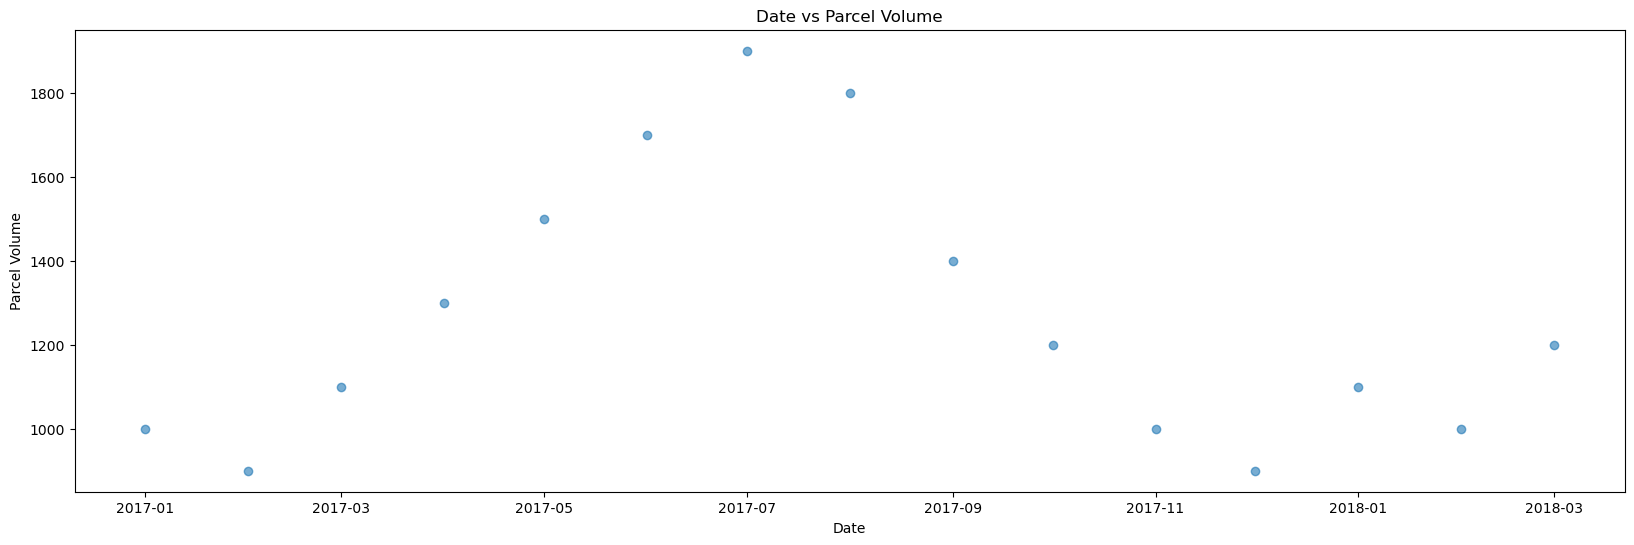

In [188]:
plt.figure(figsize=(20,6))
plt.scatter(dates, volumes, alpha=(0.6))
plt.title("Date vs Parcel Volume")
plt.xlabel("Date")
plt.ylabel("Parcel Volume")
plt.show()

In [189]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [190]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [191]:
regression.coef_

array([[-5.36283867e-15]])

In [192]:
regression.intercept_

array([9378.78240124])

In [193]:
data['NumericDate'] = (data['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [194]:
x = data[["NumericDate"]]
y = data[["Parcel Volume"]]

In [195]:
regression = LinearRegression()
regression.fit(x,y)

LinearRegression()

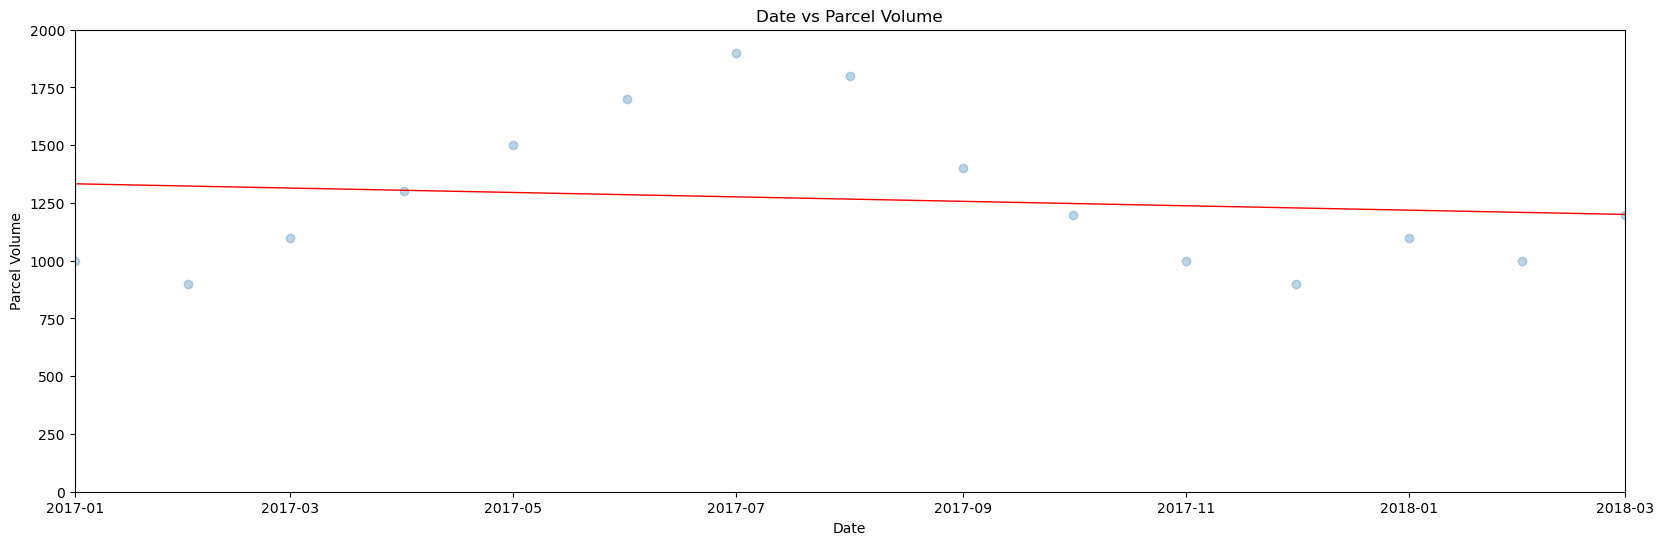

In [196]:
plt.figure(figsize=(20,6))
plt.scatter(data['Date'], y, alpha=(0.3))
plt.plot(data['Date'], regression.predict(x), color='red', linewidth=1)
plt.title("Date vs Parcel Volume")
plt.xlabel("Date")
plt.ylabel("Parcel Volume")
plt.ylim(0,2000)
plt.xlim(data['Date'].min(),data['Date'].max())
plt.show()

In [197]:
regression.score(x,y)

0.016980264260136546

In [198]:
# 1. Create a float or integer number:
your_number = regression.score(x, y)
 
# 2. Convert the number to a string value:
percentage = "{:.0%}".format(your_number)
 
# alternative for Python 3.6+: 
percentage = f"{your_number:.0%}"
 
# 3. Print the result
print(percentage)

2%


In [199]:
# Linear Regression is not suitable since it is less than 50%